In [ ]:
import pandas as pd
from tqdm import tqdm

from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import r2_score

In [ ]:
annotation_df= pd.read_csv(r'/content/drive/Shareddrives/DATA240 Data Mining/Project Files/data/annotations.csv')
annotation_df

,product_code,naics_code,raw_annotations,product_text,text_clean
0,B01F7AW9MO,311821,"['311821', '311822', '311822', '311821', '3118...",Hail Merry Chocolate Chip Cookie Dough Macaroo...,hail merry chocolate chip cookie dough macaroo...
1,B000WO434S,325998,"['325998', '325998', '325191', '325998', '3259...",NielsenMassey Pure Orange Extract with Gift bo...,nielsenmassey pure orange extract gift box oun...
2,B00HES9CMS,311320,"['-1', '311340', '0', '311320', '311320']",Viva Naturals 1 Best Selling Certified Organic...,viva natural best selling certified organic ca...
3,B008L1FO1K,312130,"['312130', '312130', '312140', '312140', '-1']",Fee Brothers Whiskey BarrelAged Bitters 5oz\nA...,fee brother whiskey barrelaged bitter oz add l...
4,B074H6R5CH,311822,"['311412', '311822', '311999', '311822', '3115...",365 by Whole Foods Market Organic Pancake Waf...,whole food market organic pancake waffle mix b...
...,...,...,...,...,...
5714,B07NJNNKJD,311330,"['311320', '311330', '-1', '311330', '311330',...",Amazon Brand Solimo Chamomile Herbal Tea Bags...,amazon brand solimo chamomile herbal tea bag c...
5715,B00S8PA1A8,311411,"['311411', '311411', '311999', '312111', '3114...",WineARita Strawberry Mango Frozen Cocktail Mix...,winearita strawberry mango frozen cocktail mix...
5716,B00W41VYKS,315212,"['315212', '315212', '0', '339914', '315212']",Wedding Flower Straws Pink White Floral Straw...,wedding flower straw pink white floral straw p...
5717,B01H1WEW0I,322291,"['322291', '322291', '322291', '327111', '3261...",Angel Soft Toilet Paper Bath Tissue 12 Double ...,angel soft toilet paper bath tissue double rol...


In [ ]:
naics_df= pd.read_csv(r'/content/drive/Shareddrives/DATA240 Data Mining/Project Files/data/naics_co2.csv')
naics_df

,bea_code,bea_desc,naics_desc,naics_code,bea_naics_desc_agg,text_clean,eio_co2
0,1111A0,Oilseed farming,"Canola farming, field and seed production",111120,"Canola farming, field and seed production. Oil...",canola farming field seed oilseed farming,1.037696
1,1111A0,Oilseed farming,"Flaxseed farming, field and seed production",111120,"Flaxseed farming, field and seed production. O...",flaxseed farming field seed oilseed farming,1.037696
2,1111A0,Oilseed farming,"Mustard seed farming, field and seed production",111120,"Mustard seed farming, field and production. Oi...",mustard seed farming field oilseed farming,1.037696
3,1111A0,Oilseed farming,"Oilseed farming (except soybean), field and se...",111120,"Oilseed farming (), field and seed production.",oilseed farming field seed,1.037696
4,1111A0,Oilseed farming,"Rapeseed farming, field and seed production",111120,"Rapeseed farming, field and seed production. O...",rapeseed farming field seed oilseed farming,1.037696
...,...,...,...,...,...,...,...
4460,339990,All other miscellaneous manufacturing,"Trees and plants, artificial, manufacturing",339999,"Trees and plants, artificial, manufacturing. A...",tree plants artificial miscellaneous,0.382101
4461,339990,All other miscellaneous manufacturing,Umbrellas manufacturing,339999,Umbrellas manufacturing. All other miscellaneo...,umbrella miscellaneous,0.382101
4462,339990,All other miscellaneous manufacturing,"Wax figures (i.e., mannequins) manufacturing",339999,Wax figures () manufacturing. All other miscel...,wax figure miscellaneous,0.382101
4463,339990,All other miscellaneous manufacturing,"Wigs, wiglets, toupees, hair pieces, manufactu...",339999,"Wigs, wiglets, toupees, hair pieces, manufactu...",wigs wiglets toupees hair pieces miscellaneous,0.382101


# NLP MODEL

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
model = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [ ]:
product_list = annotation_df.text_clean.values
naics_list = naics_df.text_clean.values

In [ ]:
def get_use_embeddings(sentences, model):
    embeddings = model(sentences)
    return embeddings.numpy()

In [ ]:
prod_embeddings = get_use_embeddings(product_list, model)

In [ ]:
prod_embeddings

array([[-0.02059172, -0.05778503, -0.00738246, ..., -0.05210909,
        -0.02294374, -0.0545868 ],
       [-0.05621971, -0.05573407, -0.05792476, ..., -0.01302353,
        -0.00616787,  0.01828294],
       [-0.03663385, -0.05456219, -0.02182303, ...,  0.03939049,
        -0.05464638, -0.05232374],
       ...,
       [-0.04929234, -0.04926759,  0.00971867, ...,  0.04042238,
        -0.03968007, -0.04768376],
       [-0.05881584, -0.03176558,  0.01286959, ...,  0.03341799,
         0.04198736,  0.05088191],
       [-0.05469664, -0.05497855,  0.05110178, ..., -0.04105191,
        -0.03396497, -0.05505495]], dtype=float32)

In [ ]:
prod_embeddings[0].shape

(512,)

In [ ]:
naics_embeddings = get_use_embeddings(naics_list, model)

In [ ]:
naics_embeddings

array([[ 0.0687952 , -0.05511655,  0.00817326, ..., -0.0203705 ,
        -0.03683759, -0.05412795],
       [ 0.07127818, -0.063021  ,  0.03817024, ..., -0.00640675,
        -0.04911487, -0.05748376],
       [ 0.07550915, -0.03439208,  0.06311402, ..., -0.04289206,
         0.00827191, -0.04341181],
       ...,
       [-0.05550376,  0.02972475,  0.00791363, ..., -0.00296689,
         0.06368008, -0.03907523],
       [ 0.01102874,  0.04201176,  0.05376838, ...,  0.00090921,
         0.05474742, -0.01600184],
       [-0.04692803,  0.02642842, -0.05171831, ..., -0.02617026,
         0.04779558, -0.00927415]], dtype=float32)

In [ ]:
import numpy as np

def cosine_similarity(embeddings1, embeddings2):
    # Normalize the embeddings to unit length
    norm1 = embeddings1 / np.linalg.norm(embeddings1, axis=1, keepdims=True)
    norm2 = embeddings2 / np.linalg.norm(embeddings2, axis=1, keepdims=True)

    # Calculate the cosine similarity
    similarity = np.dot(norm1, norm2.T)
    return similarity

In [ ]:
%time
similarity_matrix = cosine_similarity(prod_embeddings, naics_embeddings)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs


In [ ]:
similarity_matrix

array([[ 0.0196194 ,  0.0386029 ,  0.02954974, ...,  0.00467467,
         0.0362565 , -0.07361142],
       [ 0.02993713,  0.04244461,  0.02398093, ...,  0.05911482,
         0.06819643,  0.10970914],
       [ 0.1451568 ,  0.18493383,  0.10264861, ...,  0.02839884,
        -0.06528787,  0.05306005],
       ...,
       [ 0.06519359,  0.06780314,  0.07901629, ..., -0.00037484,
         0.09683042,  0.11168282],
       [ 0.05148917,  0.08399393,  0.04973321, ...,  0.05938168,
         0.03917816,  0.00069645],
       [ 0.0217057 , -0.02136311,  0.08555777, ..., -0.04979715,
        -0.05716667, -0.02530138]], dtype=float32)

# Faiss

In [ ]:
!pip install faiss-gpu

In [ ]:
import faiss

In [ ]:
def normalize_embeddings(embeddings):
    # Normalize the embeddings to unit length
    norms = np.linalg.norm(embeddings, axis=1, keepdims=True)
    return embeddings / norms

# Normalize your embeddings
prod_embeddings_normalized = normalize_embeddings(prod_embeddings)
naics_embeddings_normalized = normalize_embeddings(naics_embeddings)



In [ ]:
# Number of dimensions for embeddings
d = naics_embeddings_normalized.shape[1]
d

512

In [ ]:
prod_embeddings

array([[-0.02059172, -0.05778503, -0.00738246, ..., -0.05210909,
        -0.02294374, -0.0545868 ],
       [-0.05621971, -0.05573407, -0.05792476, ..., -0.01302353,
        -0.00616787,  0.01828294],
       [-0.03663385, -0.05456219, -0.02182303, ...,  0.03939049,
        -0.05464638, -0.05232374],
       ...,
       [-0.04929234, -0.04926759,  0.00971867, ...,  0.04042238,
        -0.03968007, -0.04768376],
       [-0.05881584, -0.03176558,  0.01286959, ...,  0.03341799,
         0.04198736,  0.05088191],
       [-0.05469664, -0.05497855,  0.05110178, ..., -0.04105191,
        -0.03396497, -0.05505495]], dtype=float32)

In [ ]:
prod_embeddings_normalized

array([[-0.02059172, -0.05778503, -0.00738246, ..., -0.05210909,
        -0.02294374, -0.0545868 ],
       [-0.05621972, -0.05573408, -0.05792476, ..., -0.01302353,
        -0.00616787,  0.01828294],
       [-0.03663385, -0.05456219, -0.02182303, ...,  0.03939049,
        -0.05464638, -0.05232374],
       ...,
       [-0.04929235, -0.04926759,  0.00971867, ...,  0.04042238,
        -0.03968007, -0.04768376],
       [-0.05881584, -0.03176558,  0.01286959, ...,  0.03341799,
         0.04198736,  0.05088191],
       [-0.05469665, -0.05497856,  0.05110178, ..., -0.04105192,
        -0.03396498, -0.05505496]], dtype=float32)

In [ ]:
# Create a FAISS index
index = faiss.IndexFlatIP(d) # for cosine search
index.add(naics_embeddings_normalized)  # Add NAICS embeddings to the index

In [ ]:
%time
k = 20  # Adjust k based on your requirements
D, I = index.search(prod_embeddings_normalized, k) # Perform the search
D # D contains the distance scores, and I contains the indices of the similar items

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs


array([[0.37406597, 0.35038862, 0.33402213, ..., 0.2997693 , 0.2929038 ,
        0.29213518],
       [0.35725445, 0.34916908, 0.33895898, ..., 0.29105002, 0.286137  ,
        0.28266203],
       [0.4936188 , 0.48478258, 0.48265415, ..., 0.45433426, 0.45426673,
        0.44816434],
       ...,
       [0.2583493 , 0.25430188, 0.25320327, ..., 0.22299236, 0.22196347,
        0.2185862 ],
       [0.3897412 , 0.3194234 , 0.31307042, ..., 0.25156733, 0.24868307,
        0.2472351 ],
       [0.27216256, 0.27005637, 0.26282772, ..., 0.22379258, 0.22073603,
        0.21762526]], dtype=float32)

In [ ]:
I

array([[ 873,  871, 2334, ...,  454,  864, 2285],
       [2659, 3187, 2634, ..., 2622, 2653, 2635],
       [ 435,  436,  433, ...,  438,  440,  437],
       ...,
       [3536, 3533, 2331, ...,  872,  874,  864],
       [2372, 2364, 2373, ..., 2340, 2334, 2296],
       [ 576,  551,  537, ...,  556,  586,  557]])

In [ ]:
nlist = 100  # Number of clusters
quantizer = faiss.IndexFlatIP(d)  # the other index
index = faiss.IndexIVFFlat(quantizer, d, nlist, faiss.METRIC_INNER_PRODUCT)

# Training
index.train(naics_embeddings_normalized)
index.add(naics_embeddings_normalized)

In [ ]:
nlist = 100
quantizer = faiss.IndexFlatIP(d)
index = faiss.IndexIVFFlat(quantizer, d, nlist, faiss.METRIC_INNER_PRODUCT)

# Normalize and Train
faiss.normalize_L2(naics_embeddings_normalized)
index.train(naics_embeddings_normalized)

# Add vectors to the index
index.add(naics_embeddings_normalized)

In [ ]:
%time
# Search
k = 20
index.nprobe = 10  # Number of clusters to search in, tweak for performance vs accuracy
D, I = index.search(prod_embeddings_normalized, k)
D

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs


array([[0.37406605, 0.35038865, 0.33402205, ..., 0.29976952, 0.2929038 ,
        0.29213518],
       [0.3572545 , 0.33895892, 0.32743233, ..., 0.2861371 , 0.28266203,
        0.28205934],
       [0.49361902, 0.4847826 , 0.482654  , ..., 0.4543342 , 0.4542667 ,
        0.44816455],
       ...,
       [0.25834933, 0.25430194, 0.25320327, ..., 0.22299229, 0.22196351,
        0.21858633],
       [0.38974124, 0.31942338, 0.31307045, ..., 0.24868305, 0.24723522,
        0.24212852],
       [0.27216247, 0.27005646, 0.2628276 , ..., 0.22379257, 0.22073613,
        0.2176252 ]], dtype=float32)

In [ ]:
I

array([[ 873,  871, 2334, ...,  454,  864, 2285],
       [2659, 2634, 2664, ..., 2653, 2635, 2620],
       [ 435,  436,  433, ...,  438,  440,  437],
       ...,
       [3536, 3533, 2331, ...,  872,  874,  864],
       [2372, 2364, 2373, ..., 2334, 2296, 2370],
       [ 576,  551,  537, ...,  556,  586,  557]])

In [ ]:
# Clear the evaluation dataframes where results will be stored.
evaluation_df_faiss = pd.DataFrame()
top5_df_faiss = pd.DataFrame()

# Iterate over each product
for ix in tqdm(range(len(annotation_df))):
    # Get the indices and scores from the FAISS results
    naics_indices = I[ix]
    cosine_scores = D[ix]

    # Create a DataFrame for the current product's results
    similarity_scores = pd.DataFrame({
        'naics_code': [naics_df.iloc[i]['naics_code'] for i in naics_indices],
        'cosine_score': cosine_scores,
        'naics_desc': [naics_df.iloc[i]['naics_desc'] for i in naics_indices],
        'product_code': annotation_df.iloc[ix]['product_code'],
        'product_text': annotation_df.iloc[ix]['text_clean']
    })

    # Aggregate scores and votes
    aggregated_scores = similarity_scores.groupby('naics_code').first()
    aggregated_scores['votes'] = similarity_scores.groupby('naics_code').size()
    aggregated_scores = aggregated_scores.sort_values(['cosine_score', 'votes'], ascending=False).reset_index()

    # Append top results to the evaluation DataFrames
    evaluation_df_faiss = pd.concat([evaluation_df_faiss, aggregated_scores.head(1)])
    top5_df_faiss = pd.concat([top5_df_faiss, aggregated_scores.head(5)])

100%|██████████| 5719/5719 [01:21<00:00, 70.00it/s] 


In [ ]:
evaluation_df_faiss

,naics_code,cosine_score,naics_desc,product_code,product_text,votes
0,311822,0.374066,Cookie dough made from purchased flour,B01F7AW9MO,hail merry chocolate chip cookie dough macaroo...,10
0,325191,0.357255,"Tanning extracts and materials, natural, manuf...",B000WO434S,nielsenmassey pure orange extract gift box oun...,20
0,311320,0.493619,"Chocolate (e.g., coatings, instant, liquor, s...",B00HES9CMS,viva natural best selling certified organic ca...,15
0,312140,0.380047,Alcoholic beverages (except brandy) distilling,B008L1FO1K,fee brother whiskey barrelaged bitter oz add l...,13
0,325199,0.360247,"Acids, organic, not specified elsewhere by pro...",B074H6R5CH,whole food market organic pancake waffle mix b...,5
...,...,...,...,...,...,...
0,311920,0.465242,"Tea, herbal, manufacturing",B07NJNNKJD,amazon brand solimo chamomile herbal tea bag c...,15
0,311411,0.550226,"Frozen ades, drinks and cocktail mixes, manufa...",B00S8PA1A8,winearita strawberry mango frozen cocktail mix...,3
0,332211,0.258349,"Table cutlery, nonprecious and precious plated...",B00W41VYKS,wedding flower straw pink white floral straw p...,6
0,322291,0.389741,Toilet paper made from purchased paper,B01H1WEW0I,angel soft toilet paper bath tissue double rol...,11


In [ ]:
## Compute the top-1 accuracy of the model
# Use annotation_df dataframe if you want to evaluate against all the products at the same time
# instead of just the test set
adf_faiss = annotation_df.merge(naics_df[['naics_code','naics_desc']].groupby('naics_code').first(),
                     left_on='naics_code', right_on='naics_code', how='left')
edf_faiss = evaluation_df_faiss.merge(naics_df[['naics_code','eio_co2']], left_on='naics_code',
                          right_on='naics_code', how='left')
if len(edf_faiss.product_code.unique()) > len(adf_faiss.product_code.unique()):
    df_faiss = adf_faiss.set_index("product_code").join(edf_faiss.set_index("product_code"), lsuffix='_human', rsuffix='_model')
else:
    df_faiss = edf_faiss.set_index("product_code").join(adf_faiss.set_index("product_code"), lsuffix='_human', rsuffix='_model')
rf_faiss = df_faiss[df_faiss.naics_code_human == df_faiss.naics_code_model]

print("Top-1 accuracy w.r.t NAICS codes (FAISS): ", len(rf_faiss.index.unique())/len(df_faiss.index.unique()))
print("Correct predictions: {}, Total Products: {}".format(len(rf_faiss.index.unique()), len(df_faiss.index.unique())))

## Compute the top-1 accuracy with respect to BEA codes (top 4 digits of NAICS code)
df_faiss['bea_human'] = df_faiss['naics_code_human'].apply(lambda x: x//100)
df_faiss['bea_model'] = df_faiss['naics_code_model'].apply(lambda x: x//100)
bf_faiss = df_faiss[df_faiss.bea_human == df_faiss.bea_model]
print("Top-1 accuracy w.r.t BEA codes (FAISS): ",
      len(bf_faiss.index.unique())/len(df_faiss.index.unique()))
print("Correct predictions: {}, Total Products: {}".format(len(bf_faiss.index.unique()),
                                                           len(df_faiss.index.unique())))

Top-1 accuracy w.r.t NAICS codes (FAISS):  0.2899108235705543
Correct predictions: 1658, Total Products: 5719
Top-1 accuracy w.r.t BEA codes (FAISS):  0.45130267529288337
Correct predictions: 2581, Total Products: 5719


In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming naics_embeddings_np is your array of embeddings
embedded = TSNE(n_components=2).fit_transform(naics_embeddings_normalized)

# embedded now contains the 2D representation of your embeddings
embedded

array([[ -6.221978 ,  28.191471 ],
       [ -6.2798   ,  28.11881  ],
       [ -6.4997807,  28.458355 ],
       ...,
       [ 22.200117 , -19.470785 ],
       [ 24.129648 , -18.731144 ],
       [ 24.512753 , -20.204044 ]], dtype=float32)

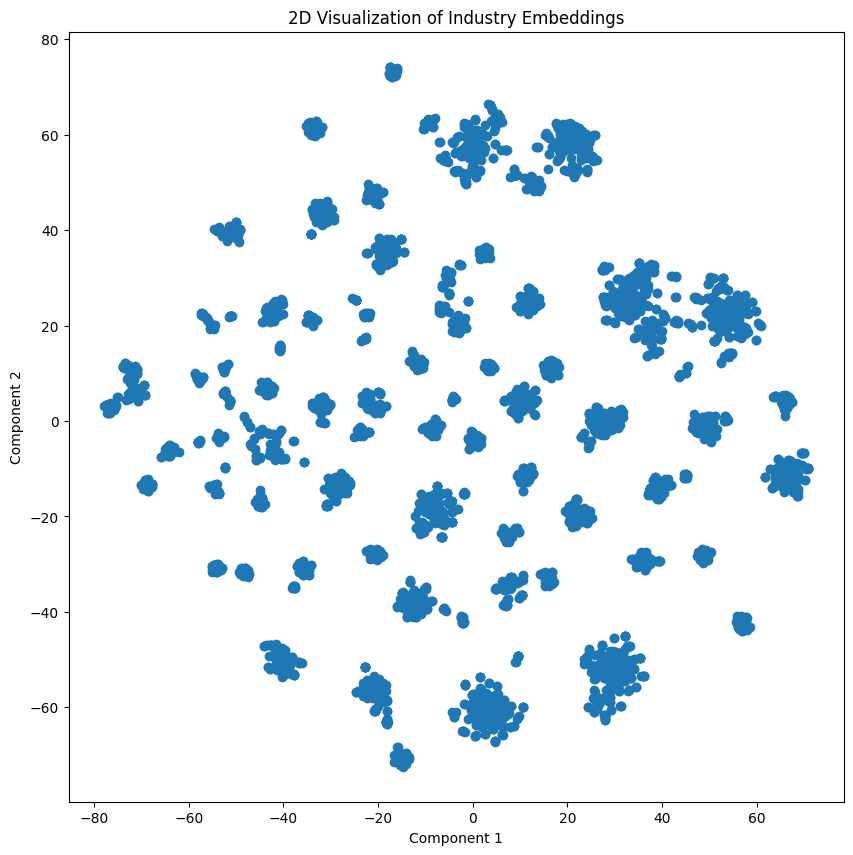

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(embedded[:, 0], embedded[:, 1], marker='o')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2D Visualization of Industry Embeddings')
plt.show()

In [ ]:
# Assuming naics_embeddings_np is your array of embeddings
embedded = TSNE(n_components=2).fit_transform(prod_embeddings_normalized)

# embedded now contains the 2D representation of your embeddings
embedded

array([[-64.0255  , -17.272047],
       [-17.261667,  18.721905],
       [ 33.41088 ,  -7.441741],
       ...,
       [ 47.09706 ,  24.514088],
       [-60.511204,  24.0059  ],
       [ 40.01664 ,  14.982201]], dtype=float32)

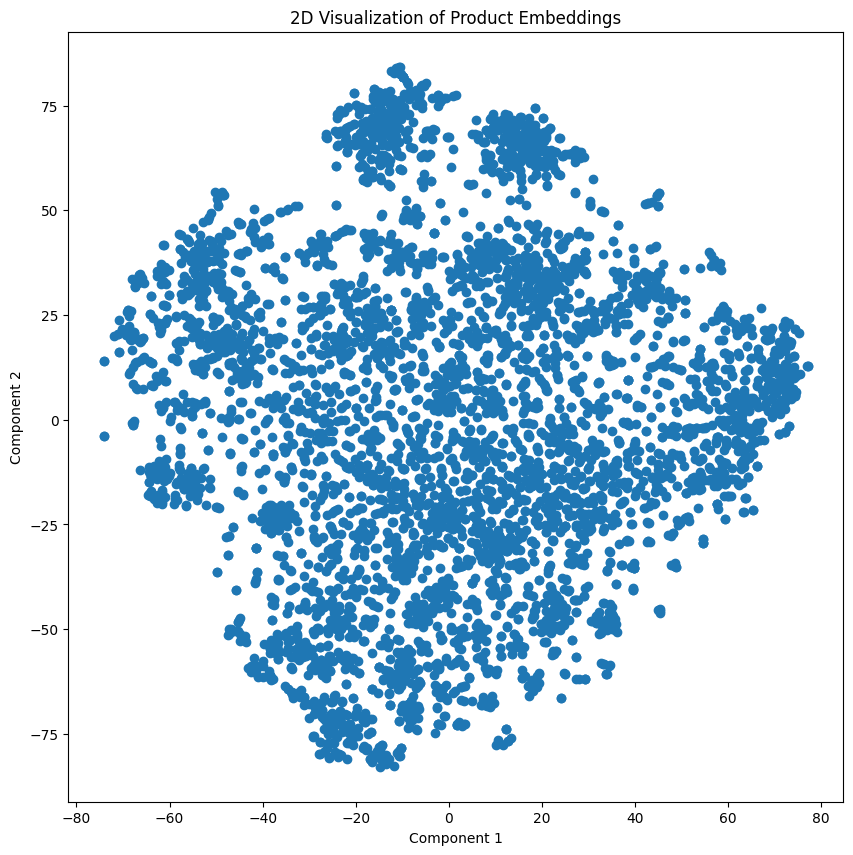

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(embedded[:, 0], embedded[:, 1], marker='o')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2D Visualization of Product Embeddings')
plt.show()